# Analyse des tweets concernant 5 livres

Dans ce notebook, nous allons analyser les données issues de Twitter que nous avons collectées concernant 5 livres afin d'étudier les mots qui sont employés pour décrire ces derniers. Les données que nous allons utiliser consistent en 5 datasets de 5000 tweets, chaque dataset concernant un livre différent parmi the Art of War, The song of Achille, Batman : the Dark Night Return, The Picture of Dorian Gray et The Book Thief.

On notera que les analyses réalisées ici concernent uniquement des tweets écrits en anglais.

In [1]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS

Le code ci-dessous affiche les nuages de mots correspondant aux données
passées en paramètre à la fonction make-tag_cloud.

In [2]:
# On télécharge les ressources nécessaires à NLTK et on initialise notre
# tokenizer
nltk.download("stopwords")
nltk.download("punkt")
tokenizer = RegexpTokenizer(r'\w+')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vincent/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vincent/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def make_tag_cloud(filepath, stopwords=[]):
	"""
	filepath : chemin vers le fichier csv qui contient les tweets à analyser
	stopwords : stopwords additionnels qui peuvent être définis par l'utilisateur
	(mots à ignorer dans le nuage de mots)
	"""

	# En plus des mots passés en paramètre, on ignore tous les mots composés d'une seule lettre et les
	# mots simples de l'anglais contenus dans les stopwords de NLTK
	stopwords.extend(["http", "https"])
	custom_stopwords = stopwords
	stop_words = nltk.corpus.stopwords.words('english')
	stop_words = set(stop_words + list(STOPWORDS) + custom_stopwords + list(string.ascii_lowercase))

	# Tokenization de tout notre texte
	tweets = pd.read_csv(filepath, sep="|")["renderedContent"]
	tweets = tweets.str.lower()
	tweets = tweets.apply(lambda row: tokenizer.tokenize(row))
	tweets = tweets.sum()
	tweets = " ".join(tweets)

	wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                collocations=False,
                min_font_size = 10).generate(tweets)
                     
	plt.figure(figsize = (8, 8), facecolor = None)
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.tight_layout(pad = 0)
	 

Voici les analyses qui ont été réalisées pour chacun des 5 livres. Pour chaque ouvrage, nous générons un nuage de mots afin de voir quels sont les mots couramment employés pour parler du livre et étudions les bigrammes et trigrammes utilisés par les utilisateurs de Twitter, toujours pour parler du livre.

## The Art of War

Voici le nuage de points généré pour l'Art de la Guerre, de Sun Tse.

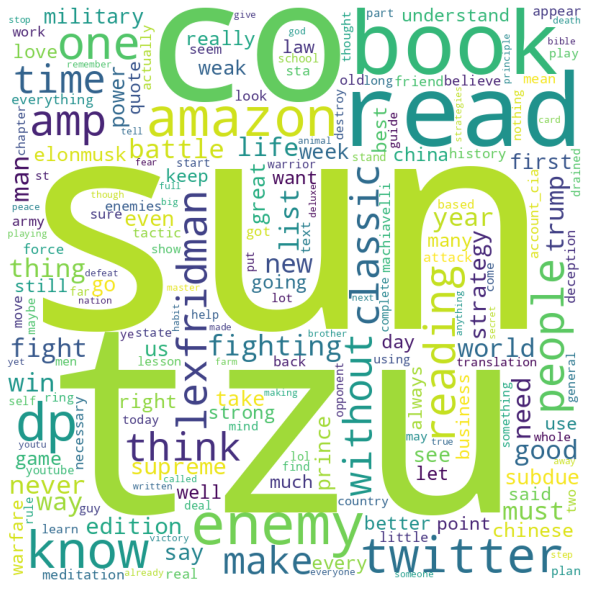

In [4]:
make_tag_cloud("data/en/the_art_of_war.csv", stopwords=["war", "art"])

## The Song of Achilles

In [ ]:
make_tag_cloud("data/en/the_song_of_achille.csv", stopwords=["song", "achille", "achilles"])

## Batman : the Dark Night Return

In [ ]:
make_tag_cloud("data/en/batman_the_dark_night_return.csv", stopwords=["batman", "dark", "knight", "return"])

## The Picture of Dorian Gray

In [ ]:
make_tag_cloud("data/en/the_picture_of_dorian_gray.csv", stopwords=["picture", "dorian", "gray"])

## The Book Thief

In [ ]:
make_tag_cloud("data/en/the_book_thief.csv", stopwords=["book", "thief"])